In [1]:
using DifferentialEquations
using Plots
using LaTeXStrings

# Differential Equations 
Julia has the package `DifferentialEquations.jl` to solve a lot of different types of differential equations. Apparently it's the best out there and surpasses the capability and performance of MATLAB. 

## Ordinary DEs
Ordinary differential equations are of the form: 
$$
\frac{\partial f}{\partial x} = \alpha f
$$
for some function $f(x)$ and scalar $\alpha$. We can solve these in Julia like so. 


In [2]:
f(u, p, t) = p[1]*u

# specify initial conditions and tspan
p = 0.9
u₀ = 0.1
tspan = (0.0, 1.0)
prob = ODEProblem(f, u₀, tspan, p)

ODEProblem with uType Float64 and tType Float64. In-place: false
timespan: (0.0, 1.0)
u0: 0.1

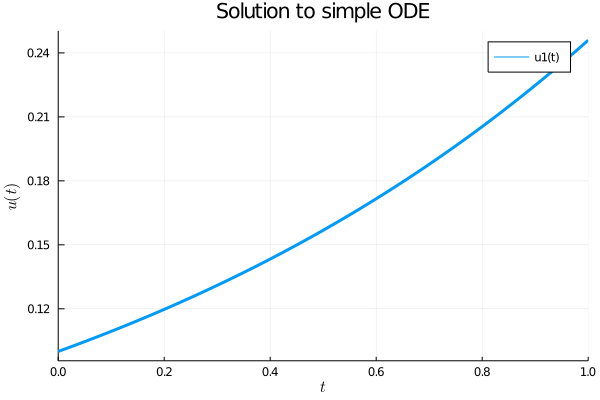

In [3]:

solution = solve(prob, Tsit5())
plot(solution, title="Solution to simple ODE", linewidth=3, xaxis=L"t", yaxis=L"u(t)")

### Pendulum
Now consider the dynamics of a pendulum, 
$$ 
ml^2 \ddot{\theta} + mgl\sin\theta = {u} \\
x = \begin{bmatrix}
\theta \\
\dot{\theta}
\end{bmatrix}, \quad
\dot{x} = \begin{bmatrix}
\dot{\theta} \\
\ddot{\theta}
\end{bmatrix}
$$
$$
\dot{x} = f(x, u) = \begin{bmatrix}
\dot{\theta} \\
-\frac{g}{l} \sin\theta + \frac{1}{m l^2} u
\end{bmatrix}
$$


In [4]:
# we can define a time varying function inside of the problem
p = [9.81, 1.0, 1.0, t -> 2*cos(t)]
function pendulum!(dx, x, p, t)
    g, l, m, u = p
    dx[1] = x[2]
    dx[2] = -(g/l)*sin(x[1]) + (1/m*l^2)*u(t)
end

pendulum! (generic function with 1 method)

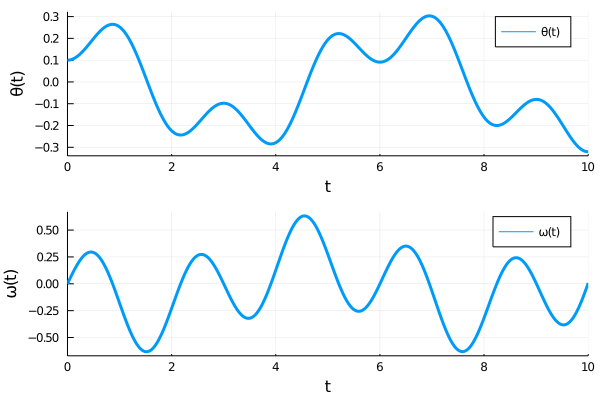

In [5]:
# initial conditions
x0 = [0.1, 0.0]
# time span
tspan = (0, 10.0)
# ODE problem is using a modify arg since it changes the dx arg in place
prob = ODEProblem(pendulum!, x0, tspan, p)
sol = solve(prob)
plot(sol, xlabel="t", ylabel=["θ(t)" "ω(t)"], label=["θ(t)" "ω(t)"], linewidth=3, layout=(2, 1))

We can add some damping by modifying the $\dot{\theta}$ term inside the dynamics function: 
$$
\dot{x} = f(x, u) = \begin{bmatrix}
\dot{\theta} \\
-\frac{g}{l} \sin\theta - \mu \dot{\theta} + \frac{1}{m l^2} u
\end{bmatrix}
$$


In [6]:
# initial conditions
x0 = [0.1, 0.0]
# time span
tspan = (0, 10.0)
# define the damped dynamics with in place modification
function pendulum_damped!(dx, x, p, t)
    g, l, m, μ, u = p
    dx[1] = x[2]
    dx[2] = -(g/l)*sin(x[1]) + (1/m*l^2)*u(t) - μ*x[2]
end

pendulum_damped! (generic function with 1 method)

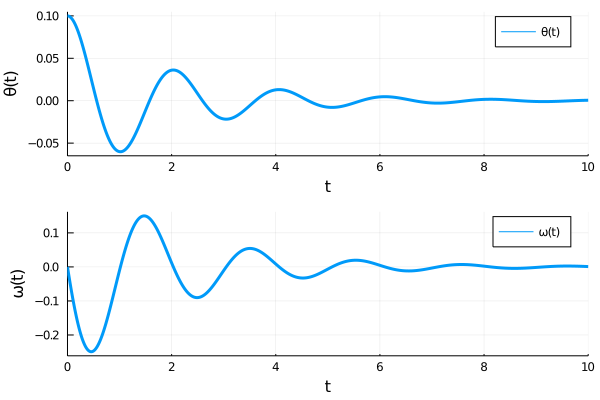

In [7]:
# we can look at this with no external force to make sure the math damps properly
p = [9.81, 1.0, 1.0, 1.0, t -> 0]
prob = ODEProblem(pendulum_damped!, x0, tspan, p)
sol = solve(prob)
plot(sol, xlabel="t", ylabel=["θ(t)" "ω(t)"], label=["θ(t)" "ω(t)"], linewidth=3, layout=(2, 1))

### Mass Spring Damper
Now consider the dynamics of a mass spring damper: 

$$ 
\ddot{x} = -k x - \mu \dot{x} + \beta u(t)
$$
For constants $\mu, \beta$ and forcing term $u(t)$. 

We can put this into state space form: 
$$
\dot{x} = f(x, u) = \begin{bmatrix}
\dot{x} \\
-kx - \mu \dot{x} + \beta u(t)
\end{bmatrix}
$$

In [8]:
# initial conditions
x0 = [0.1, 0.0]
# time span
tspan = (0, 10.0)
function spring!(dx, x, p, t)
    k, μ, β, u = p
    dx[1] = x[2]
    dx[2] = -k * x[1] - μ*x[2] + β*u(t)
end

spring! (generic function with 1 method)

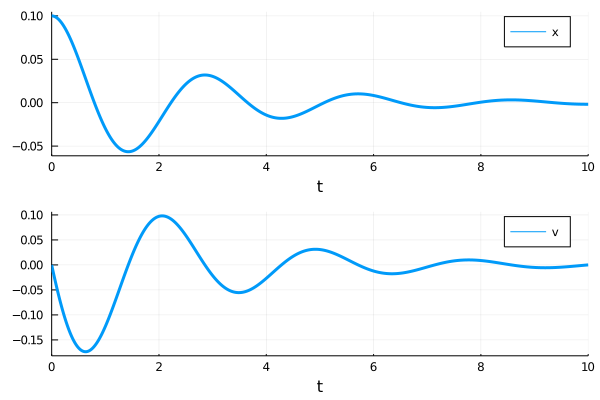

In [9]:
# spring
k = 5
# damping
μ = 0.8
# forcing multiple
β = 0.0
u = t -> 0.1*t
pₛ = [k, μ, β, u]
prob = ODEProblem(spring!, x0, tspan, pₛ)
sol = solve(prob)
plot(sol, label=["x" "v"], layout=(2,1), linewidth=3)

We can kind of think of the pendulum as a polar version of the mass spring damper. Both move in oscillatory ways. 